<a href="https://colab.research.google.com/github/VMBoehm/N3AS_Project_Malika/blob/main/3_MINST_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets as datasets
from sklearn import model_selection as ms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense


In [3]:
num_classes = 10 
input_shape = (28, 28, 1)

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
X_train: (60000, 28, 28, 1)
y_train: (60000, 10)
X_test: (10000, 28, 28, 1)
y_test: (10000, 10)


In [4]:
basic_model = Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
basic_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [5]:
opt = keras.optimizers.Adam(learning_rate=0.01)
basic_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [6]:
basic_model.fit(X_train, y_train, batch_size=128, epochs=1, validation_split= 0.1)

422/422 [==============================] - 41s 96ms/step - loss: 0.1833 - accuracy: 0.9425 - val_loss: 0.0457 - val_accuracy: 0.9865


In [7]:
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.0498 - accuracy: 0.9831
Loss =  0.04984959214925766
Accuracy =  0.9830999970436096


In [8]:
y_score = basic_model.predict(X_test)

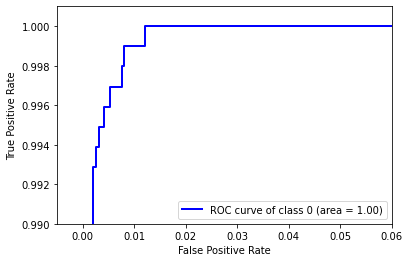

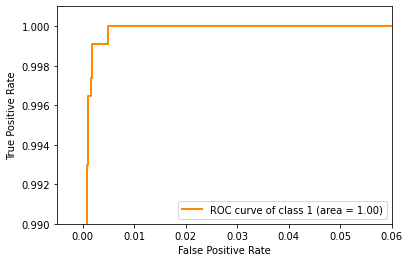

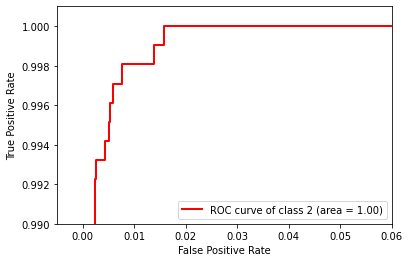

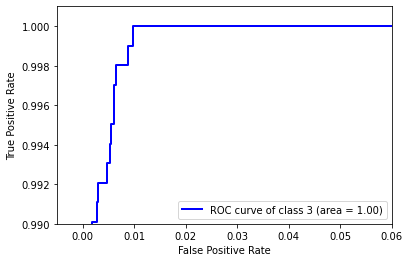

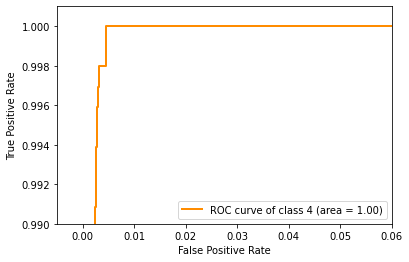

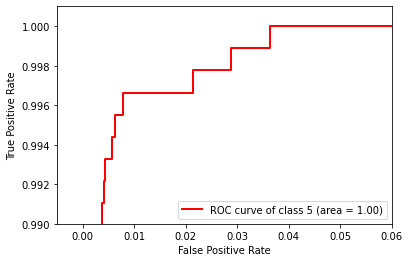

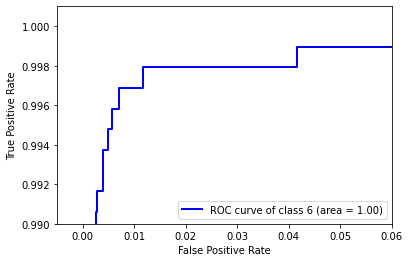

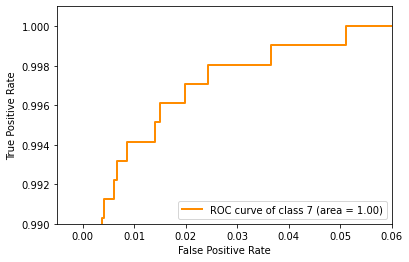

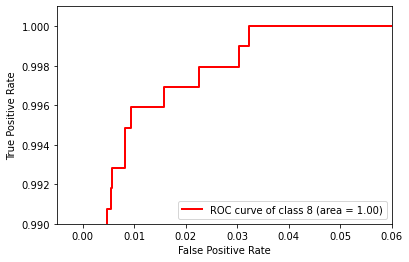

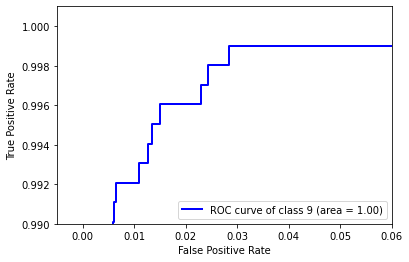

In [20]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


colors = cycle(['blue', 'darkorange', 'red'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim(-0.005, 0.06)
    plt.ylim(0.99, 1.001)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()







In [24]:
## calulate accuracy by hand
probs = basic_model.predict(X_test)
preds = probs

y_pred = (preds >= .5).astype('int')


def compute_tp_tn_fn_fp(act, pred):

	tp = sum((act == 1) & (pred == 1))
	tn = sum((act == 0) & (pred == 0))
	fn = sum((act == 1) & (pred == 0))
	fp = sum((act == 0) & (pred == 1))
	return tp, tn, fp, fn


def compute_accuracy(tp, tn, fn, fp):
  return((tp + tn) * 100)/ ( tp + tn + fn + fp)


def getAccuracy(y_test, predictions):
   n = len(y_test) 
   correct = 0
   for x in range(n):
       if y_test[x] == predictions[x]:
           correct += 1
   return print((correct/n) * 100.0)


print('y_score:',np.shape(y_score))
print('y_test:',np.shape(y_test))

tp_k, tn_k, fp_k, fn_k = compute_tp_tn_fn_fp(y_test,y_pred )
acc = compute_accuracy(tp_k, tn_k, fn_k, fp_k)

print("test acuuracy",acc)

y_score: (10000, 10)
y_test: (10000, 10)
test acuuracy [99.77 99.81 99.61 99.75 99.74 99.58 99.69 99.57 99.55 99.61]


In [25]:
probs = basic_model.predict(X_test)
preds = probs

y_pred = (preds >= .5).astype('int')

for i in range(10):
  score = y_score[i,:]
  test = y_pred[i,:]
  print(getAccuracy(score,test))
  

 
    

0.0
None
0.0
None
0.0
None
0.0
None
0.0
None
0.0
None
0.0
None
0.0
None
0.0
None
0.0
None


In [88]:
print(y_test)
print(y_pred)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
